In [40]:
import sys
import csv
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1 - Oil production

Relative oil production per country between 1900 and 2023

In [41]:
# load data, set index, and workout total production in given unit
oil = pd.read_csv("version_2/input/oilproductionrelative_v2.csv")
oil.set_index("Year", inplace=True)
oil['Total'] = oil.sum(axis=1)

In [42]:
# relative percentage of production into "country_percent" columns
for column in oil:
    oil[column + "_percent"] = oil[column] / oil.Total

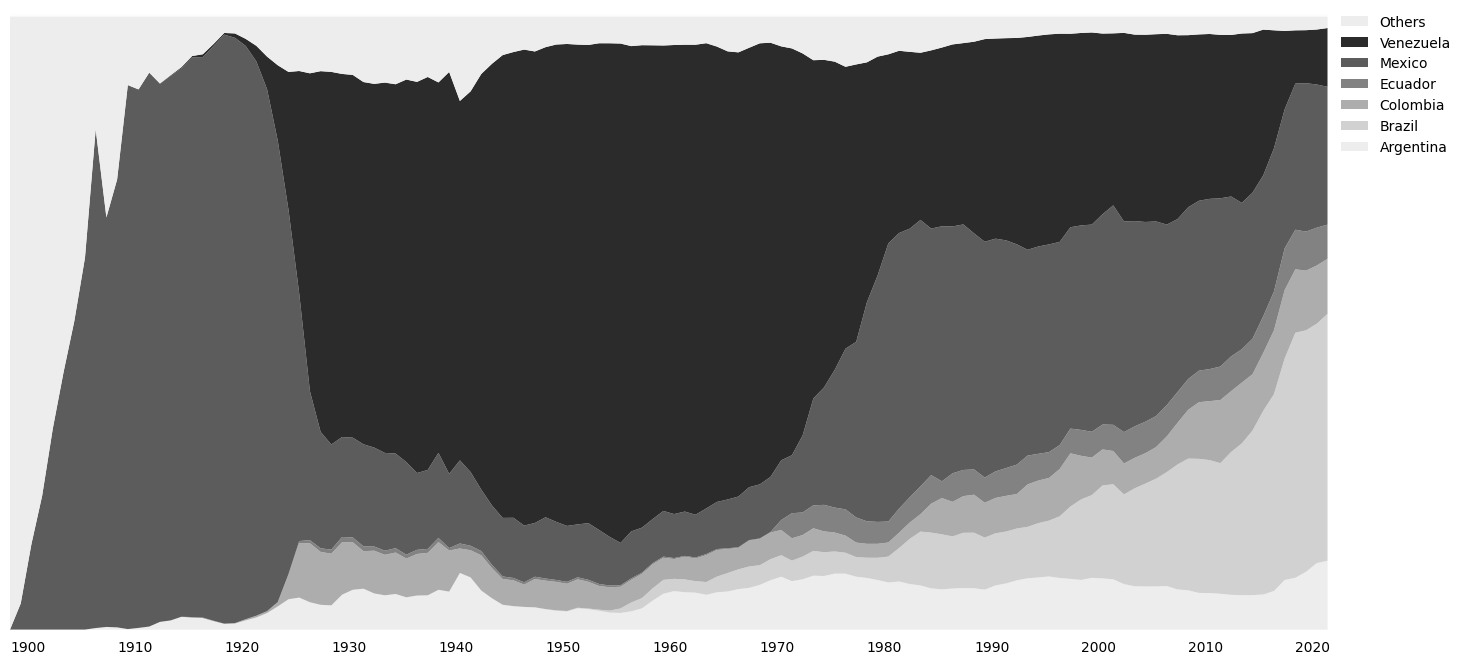

In [43]:
# grey palette for black and white printing
sns.set_palette("Greys")

# decent size and light grey background
fig, ax = plt.subplots(figsize = (17,8))
ax.set_facecolor('#fdfdfd')

# actual plot
ax.stackplot(
    oil.index,
    oil.Argentina_percent,
    oil.Brazil_percent,
    oil.Colombia_percent,
    oil.Ecuador_percent,
    oil.Mexico_percent,
    oil.Venezuela_percent,
    oil.Others_percent
)

# minimalistic x axis without precise ticks
plt.xticks(np.arange(1900, 2023, 10))
ax.get_yaxis().set_ticks([])
ax.tick_params(length=4, color="white")
plt.xticks(ha='left')

# no border, clean layout, no non-sense
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ymargin(0.005)
ax.set_xmargin(0)

# legend placement is manual (and tricky)
labels_legend = [
 'Argentina',
 'Brazil',
 'Colombia',
 'Ecuador',
 'Mexico',
 'Venezuela',
 'Others']
ax.legend(labels=labels_legend, loc='right', bbox_to_anchor=(0.558, 0.5, 0.545, 0.77), edgecolor="white", reverse=True)

# output to file
plt.savefig("version_2/output/1_oil.png")

# 2 - Selected

Subset of 3 countries with raw amounts

__Important__: match the colors to other graphics

In [44]:
# load data, set index
selected = pd.read_csv("version_2/input/1-laselected.csv")
selected.set_index("Year", inplace=True)

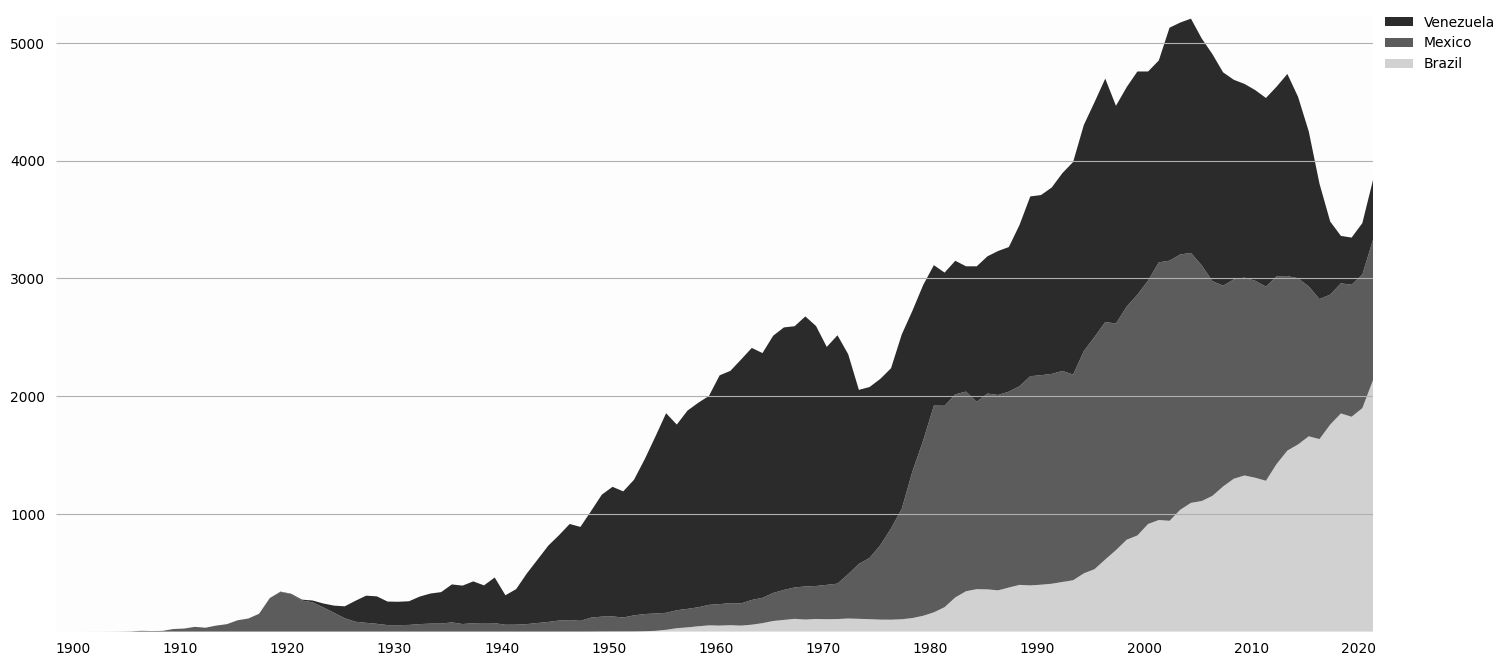

In [45]:
# custom palette to match country colors to first plot
palette_selected = ["#d1d1d1", "#5c5c5c", "#2b2b2b"]
sns.set_palette(sns.color_palette(palette_selected))

# all plots with same lightest grey background
fig, ax = plt.subplots(figsize = (17,8))
ax.set_facecolor('#fdfdfd')

# actual plot
ax.stackplot(
    selected.index,
    selected.Brazil,
    selected.Mexico,
    selected.Venezuela
)

# Raw numbers need a Y axis scale and lines
plt.xticks(np.arange(1900, 2021, 10))
plt.yticks(np.arange(1000, 6000, 1000))
ax.tick_params(length=4, color="white")
plt.xticks(ha='left')
ax.grid(axis="y")

# no border, clean layout, no non-sense
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ymargin(0.005)
ax.set_xmargin(0)

# legend placement is manual (and tricky)
labels_legend = [
 'Brazil',
 'Mexico',
 'Venezuela',
]
ax.legend(labels=labels_legend, loc='right', bbox_to_anchor=(0.558, 0.5, 0.544, 0.91), edgecolor="white", reverse=True)

# output to file
plt.savefig("version_2/output/2_selected.png")

# 3 - Raffinage
Raw data of oil refinment by country of shorter period of time (1940-2023)

In [46]:
# load data, set index
raffinage = pd.read_csv("version_2/input/2-refining.csv")
raffinage.set_index("Year", inplace=True)

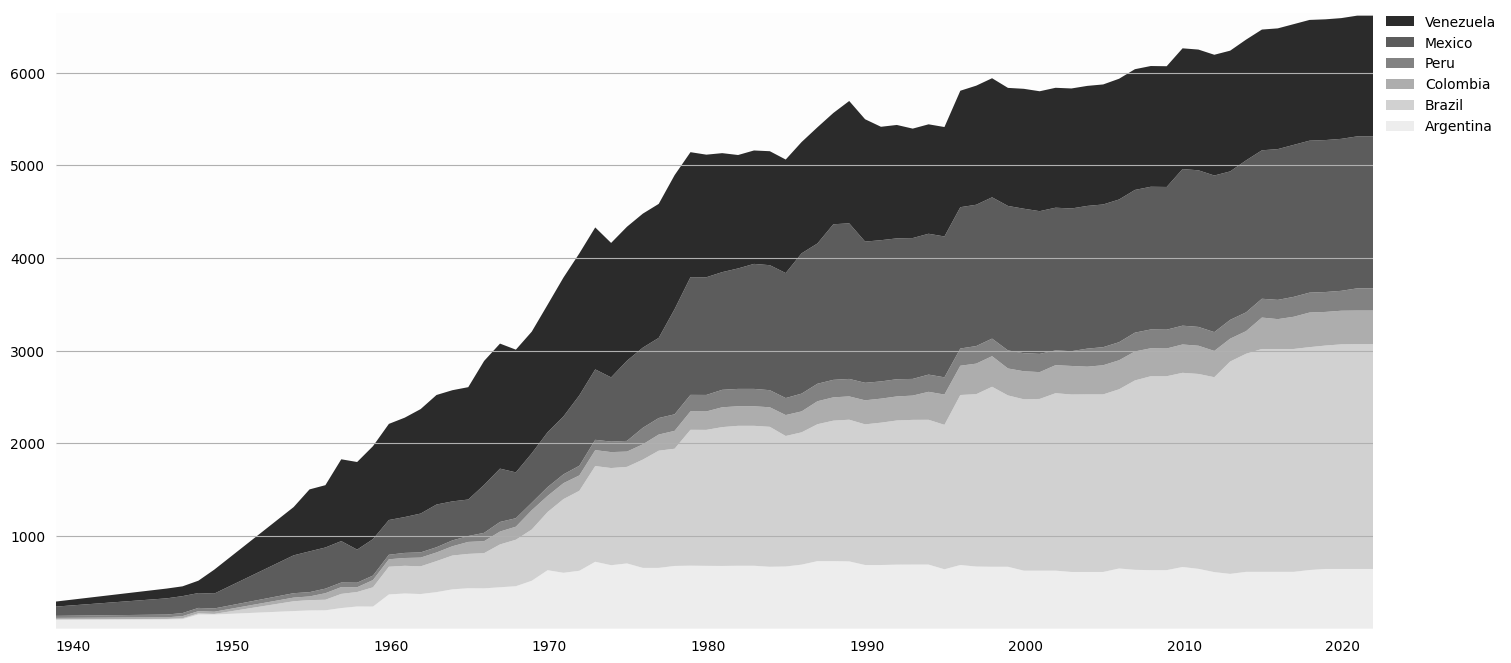

In [47]:
# Same palette as first (oil) plot but Ecuador is now Peru
sns.set_palette("Greys")

# same size and background color
fig, ax = plt.subplots(figsize = (17,8))
ax.set_facecolor('#fdfdfd')

# actual plot
ax.stackplot(
    raffinage.index,
    raffinage.Argentina,
    raffinage.Brazil,
    raffinage.Colombia,
    raffinage.Peru,
    raffinage.Mexico,
    raffinage.Venezuela
)

# Raw numbers need a Y axis scale and lines
plt.xticks(np.arange(1940, 2023, 10))
plt.yticks(np.arange(1000, 7000, 1000))
ax.tick_params(length=4, color="white")
plt.xticks(ha='left')
ax.grid(axis="y")

# same minimalist look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ymargin(0.005)
ax.set_xmargin(0)

# legend
labels_legend = [
 'Argentina',
 'Brazil',
 'Colombia',
 'Peru',
 'Mexico',
 'Venezuela',
]
ax.legend(labels=labels_legend, loc='right', bbox_to_anchor=(0.558, 0.5, 0.545, 0.80), edgecolor="white", reverse=True)

# output to file
plt.savefig("version_2/output/3_raffinage.png")

# 4 - Energy mix
General proportion of energy production source from 1800 to 2000

In [48]:
# load data, set index, and workout total production in given unit
mix = pd.read_csv("version_2/input/3-energymix.csv")
mix.set_index("Year", inplace=True)
mix['Total'] = mix.sum(axis=1)

In [49]:
# workout percentages in their columns
for column in mix:
    mix[column + "_percent"] = mix[column] / mix.Total

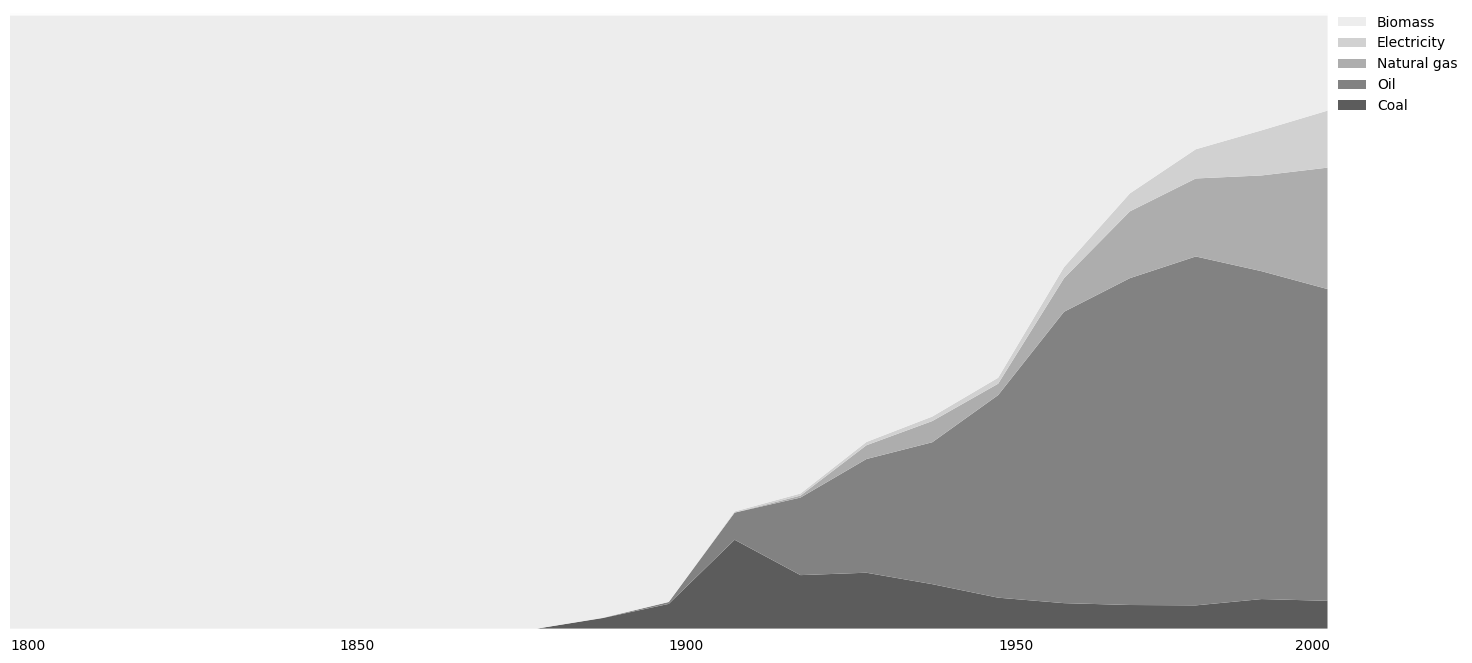

In [36]:
# custom palette to prevent dark grey "biomass" to empty printer black ink
paletto = [
    "#ededed",
    "#d1d1d1",
    "#adadad",
    "#828282",
    "#5c5c5c"
]

# same settings as before
fig, ax = plt.subplots(figsize = (17,8))
ax.set_facecolor('#fdfdfd')

# actual plot
ax.stackplot(
    mix.index,
    mix.Coal_percent,
    mix.Oil_percent,
    mix["Natural gas_percent"],
    mix.Electricity_percent,
    mix.Biomass_percent,
    colors = paletto[::-1]
)

# changed x axis labels anchor
plt.xticks(np.arange(1800, 2001, 50))
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([1800, 1850, 1900, 1950, 1995])
x_labels = ["1800", "1850", "1900", "1950", "2000"]
ax.set_xticklabels(x_labels)
ax.tick_params(length=4, color="white")
plt.xticks(ha='left')

# same clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ymargin(0.005)
ax.set_xmargin(0)

# legend
labels_legend = [
 'Coal',
 'Oil',
 'Natural gas',
 'Electricity',
 'Biomass'
]
ax.legend(labels=labels_legend, loc='right', bbox_to_anchor=(0.558, 0.5, 0.55, 0.832), edgecolor="white", reverse=True)

# output to file
plt.savefig("version_2/output/4_mix.png")

__Note regarding x axis labels placement__

In most of the plots (oil, raffinage, selected), labels on the x axis are "anchored left of their ticks". It means that they are shifted slightly to the right relative to the actual date. Their respective individual tick, placed on the x axis at the precise date, are aligned with the tip of the first character of the label, not the middle, as is the case with the above plot (mix).
This was done to prevent the first and last label to be visualy misaligned with the frame of the plot. The first label would be halfway out of the frame, and the last (2020) would be entirely inside the frame, as the source data have yearly datapoints until 2023.
Label have been shifted to visualy mark this imprecision. Conveying a sense of temporal blur, it underlines the function of these visual representations: these are not precise analytical tools, but allow the reader to perceive historical trends in the data.

# 5 - Energy balance

In [12]:
# load data, set index, and workout total production in given unit
balance = pd.read_csv("version_2/input/5-energybalance.csv")
balance.set_index("Year", inplace=True)
balance['Total'] = balance.sum(axis=1)

In [13]:
# workout percentages in their columns
for column in balance:
    balance[column + "_percent"] = balance[column] / balance.Total

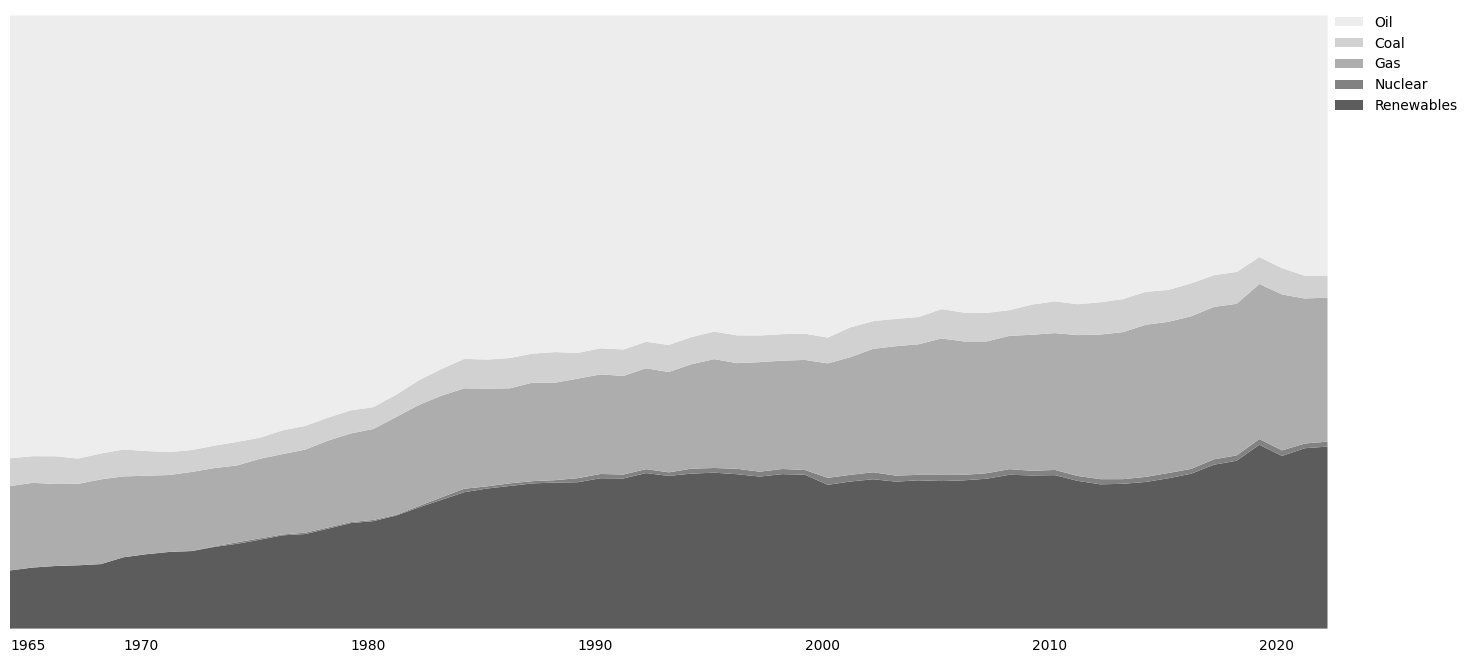

In [28]:
# custom palette matches the biomass one
paletto = [
    "#ededed",
    "#d1d1d1",
    "#adadad",
    "#828282",
    "#5c5c5c"
]

# same settings as before
fig, ax = plt.subplots(figsize = (17,8))
ax.set_facecolor('#fdfdfd')

# actual plot
ax.stackplot(
    balance.index,
    balance.Renewables_percent,
    balance["Nuclear consumption - TWh_percent"],
    balance["Gas consumption - TWh_percent"],
    balance["Coal consumption - TWh_percent"],
    balance["Oil consumption - TWh_percent"],
    colors = paletto[::-1]
)

# custom x axis labels because data starts earlier
start = np.array([1965])
middle = np.arange(1970, 2019, 10)
end = np.array([2020])
ticks_array = np.concatenate((start, middle, end), axis=0)
plt.xticks(ticks_array)
ax.get_yaxis().set_ticks([])
ax.tick_params(length=4, color="white")
#ax.tick_params(rotation=35)
plt.xticks(ha='left')

# same clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ymargin(0.005)
ax.set_xmargin(0)

# legend
labels_legend = [
 'Renewables',
 'Nuclear',
 'Gas',
 'Coal',
 'Oil',
]
ax.legend(labels=labels_legend, loc='right', bbox_to_anchor=(0.558, 0.5, 0.55, 0.832), edgecolor="white", reverse=True)

# output to file
plt.savefig("version_2/output/5_balance.png")

__Note regarding input data pre-processing__

All datasets have been manually collected, curated, corrected for formatting error, converted to csv with appropriate headers and verified.